In [85]:
from pymongo import MongoClient
import sys
sys.path.append('..')
from calcimetry.mongo_api import MongoInfo, MongoAPI
import calcimetry.use_server as server
img_path = server.init()
import pandas as pd
import json
import numpy as np
import re

server : http://imgserver.10.68.0.250.nip.io/data/andra


Status Code 200


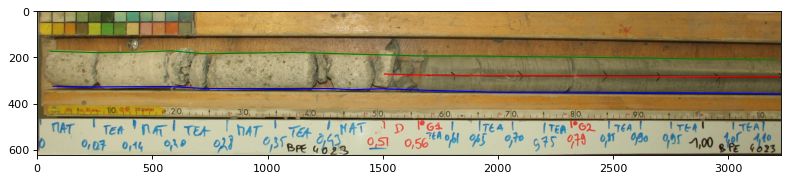

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.pyplot import figure

mongo_info = MongoInfo()

def draw_line(polyline, color='red'):
    x = []
    y = []
    for t in polyline:
        x.append(t[0])
        y.append(t[1])
    apath = Path(list(zip(x, y)))
    apatch = patches.PathPatch(apath, linewidth=1, facecolor='none', edgecolor=color)
    return apatch


drill_name = 'BPE4023'
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    doc = mongo_api.db['images'].find_one({'DrillName': drill_name })

    
    top_line = draw_line(doc['k_Up'], color='green')
    arrow_line = draw_line(doc['k_Arrow'], color='red')
    bottom_line = draw_line(doc['k_Down'], color='blue')

    filename = f"/data/andra/calci_photos/{drill_name}/Photos/{doc['FileName']}"
    img = server.get_file(filename)

    figure(figsize=(12, 8), dpi=80)
    plt.imshow(img)
    plt.gca().add_patch(top_line)
    plt.gca().add_patch(arrow_line)
    plt.gca().add_patch(bottom_line)

In [151]:
file = '/work/armitagj/data/csvs/REP4/REP2303/Photos/imgs2.csv'
df = pd.read_csv(file, delimiter=',')

df

,ImageId,Path,FileName,DrillName,Cote0,Cote1,PxSize,PySize,px0,px1,k_Up,k_Down,k_Arrow
0,2223,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0000_0097.jpg,REP2303,0,97,1479,324,21,1441,{{239;67};{473;84};{479;80};{497;75};{520;83};...,{{225;160};{326;161};{338;169};{462;176};{474;...,{{1299;106};{1423;107}}
1,2224,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0085_0186.jpg,REP2303,85,186,1587,342,104,1586,{{60;81};{72;80};{79;88};{90;82};{101;85};{261...,{{38;174};{72;172};{77;182};{89;171};{93;182};...,{{110;126};{298;137};{337;135};{688;146};{743;...
2,2225,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0180_0280.jpg,REP2303,180,280,1563,339,63,1529,{{12;76};{102;83};{740;100};{1490;113}},{{18;177};{735;192};{1231;200};{1512;208}},{{39;139};{298;144};{517;150};{733;156};{781;1...
3,2226,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0270_0375.jpg,REP2303,270,375,1560,357,17,1555,{{20;93};{165;92};{173;94};{205;90};{220;109};...,{{13;185};{170;188};{176;172};{191;188};{219;1...,{{15;148};{82;151};{149;159};{385;152};{792;15...
4,2227,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0330_0435.jpg,REP2303,330,435,1584,357,12,1537,{{45;87};{399;100};{1218;110};{1266;107};{1407...,{{40;181};{365;189};{985;200};{1238;197};{1249...,{{51;141};{421;149};{1245;166}}
5,2228,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0420_0525.jpg,REP2303,420,525,1590,330,22,1585,{{168;89};{529;83};{1572;97}},{{167;178};{756;178};{1230;185};{1585;189}},{{156;129};{339;127};{359;132};{416;133};{497;...
6,2229,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0510_0610.jpg,REP2303,510,610,1557,342,18,1507,{{6;95};{411;93};{774;98};{1490;110}},{{13;183};{718;185};{1323;196};{1514;204}},{{15;130};{147;130};{410;131};{704;133};{1012;...
7,2230,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0590_0700.jpg,REP2303,590,700,1578,342,14,1576,{{54;94};{142;92};{538;94};{545;89};{981;93};{...,{{32;186};{491;183};{917;182};{984;187};{1153;...,{{39;130};{114;131};{138;127};{290;130};{543;1...
8,2231,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0640_0730.jpg,REP2303,640,730,1452,345,38,1385,{{32;92};{237;88};{248;95};{269;90};{449;91};{...,{{32;176};{414;178};{675;183};{1048;187};{1055...,{{37;125};{186;125};{419;124};{464;125};{690;1...
9,2232,D:\ANDRA_PHOTOS\Donn�es_Calci_Photos\REP2303\P...,GTR2005-01_0005_REP2303_0705_0810.jpg,REP2303,705,810,1560,321,112,1495,{{53;92};{61;84};{618;82};{1379;73}},{{61;177};{897;171};{1442;163}},{{41;135};{49;132};{383;134};{588;133};{817;13...


In [152]:
df = df.drop(columns=['Path'])

df['k_Up'] = df['k_Up'].str.replace(r'{', '', regex=True)
df['k_Up'] = df['k_Up'].str.replace(r'}', '', regex=True)
df['k_Up'] = df['k_Up'].str.replace(r';', ',', regex=True)

df['k_Down'] = df['k_Down'].str.replace(r'{', '', regex=True)
df['k_Down'] = df['k_Down'].str.replace(r'}', '', regex=True)
df['k_Down'] = df['k_Down'].str.replace(r';', ',', regex=True)

df['k_Arrow'] = df['k_Arrow'].str.replace(r'{', '', regex=False)
df['k_Arrow'] = df['k_Arrow'].str.replace(r'}', '', regex=False)
df['k_Arrow'] = df['k_Arrow'].str.replace(r';', ',', regex=False)

df['k_Up'] = df['k_Up'].apply(
    lambda x: np.array(x.split(','), dtype=int).reshape(-1, 2) if(pd.notnull(x)) else x)
df['k_Down'] = df['k_Down'].apply(
    lambda x: np.array(x.split(','), dtype=int).reshape(-1, 2) if(pd.notnull(x)) else x)
df['k_Arrow'] = df['k_Arrow'].apply(
    lambda x: np.array(x.split(','), dtype=int).reshape(-1, 2) if(pd.notnull(x)) else x)

In [153]:
payload = json.loads(df.to_json(orient='records'))

In [154]:
print(payload)

[{'ImageId': 2223, 'FileName': 'GTR2005-01_0005_REP2303_0000_0097.jpg', 'DrillName': 'REP2303', 'Cote0': 0, 'Cote1': 97, 'PxSize': 1479, 'PySize': 324, 'px0': 21, 'px1': 1441, 'k_Up': [[239, 67], [473, 84], [479, 80], [497, 75], [520, 83], [537, 74], [544, 58], [709, 57], [715, 70], [734, 66], [730, 55], [742, 51], [771, 57], [790, 64], [815, 53], [843, 53], [883, 46], [903, 75], [998, 64], [996, 51], [1000, 46], [1045, 48], [1053, 44], [1099, 46], [1201, 62], [1246, 60], [1257, 67], [1265, 60], [1276, 62], [1458, 61]], 'k_Down': [[225, 160], [326, 161], [338, 169], [462, 176], [474, 153], [509, 174], [535, 157], [541, 159], [541, 167], [560, 170], [568, 170], [593, 179], [624, 169], [654, 175], [669, 158], [680, 170], [729, 149], [751, 167], [793, 136], [804, 170], [878, 167], [887, 149], [905, 166], [998, 159], [1006, 152], [1007, 120], [1047, 159], [1057, 169], [1068, 156], [1079, 161], [1157, 162], [1179, 142], [1191, 159], [1210, 154], [1216, 154], [1263, 133], [1259, 156], [1271,

In [155]:
with MongoAPI(mongo_info=mongo_info) as mongo_api:
    if mongo_api.db['images'].find_one({'DrillName': df['DrillName'][0]}) is None:
        mongo_api.write_img_many(payload)